# Fundamental Data Structures and Algorithms 02 - Computational Complexity and Big O Notation

## Unit 1: Foundations (continued)
---

*Class Discussion*
> How to determine which data structure or which algorithm is considered 'good'?

(double click <u><b style="color:blue;">here</b></u>)
<!--
One of the natural methods of measuring the "goodness" is by using running time,
but there are many variable factors that affects this measure. Examples:
   - hardware (processor speed, memory, etc.)
   - software environment (operating system, programming language, etc.)
   - data types
   - data size

Therefore, we need some sort of standard:

Firstly, we need to have some sort of metric (or standards of measurement) to quantify the performance of a data structure or an algorithm.

Secondly, once we have determine the metric to use, we need to know what aspects of the algorithm or data structure that we need to measure.
-->

---

### Computational Complexity

*Computational Complexity:*  
Computational complexity is a field from computer science which analyzes algorithms based on the amount resources required for running it. The amount of required resources varies based on the input size, so the complexity is generally expressed as a function of n, where n is the size of the input.
1. Time complexity 
2. Space complexity
<br>
<br>
**This chapter focuses mostly on <u>time complexity</u> :**  
- assume hardware and software environments remain the same
- three guiding principles:
 - worst case analysis (make no assumptions on the data)
 - ignore (or suppress) constant factors and lower order terms. At large inputs, higher order terms dominate.
 - focus on problems with large input sizes.

### Time Complexity

In computer science, the time complexity is the computational complexity that describes the amount of time it takes to run an algorithm. Time complexity is commonly estimated by counting the number of elementary operations performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform.

When analyzing the time complexity of an algorithm we may find three cases: best-case, average-case and worst-case. Let’s understand what it means.

Suppose we have the following unsorted list [1, 5, 3, 9, 2, 4, 6, 7, 8] and we need to find the index of a value in this list using linear search.  

**best-case:** this is the complexity of solving the problem for the best input. In our example, the best case would be to search for the value 1. Since this is the first value of the list, it would be found in the first iteration.  

**average-case:** this is the average complexity of solving the problem. This complexity is defined with respect to the distribution of the values in the input data. Maybe this is not the best example but, based on our sample, we could say that the average-case would be when we’re searching for some value in the “middle” of the list, for example, the value 2.  

**worst-case:** this is the complexity of solving the problem for the worst input of size n. In our example, the worst-case would be to search for the value 8, which is the last element from the list.

**Usually, when describing the time complexity of an algorithm, we are talking about the worst-case.**  

Ok, but how we describe the time complexity of an algorithm?
We use a mathematical notation called Big-O.

---

*Recall*
> How important is the structure of the English dictionary?  
> (Imagine a dictionary where words are arranged at random vs. one that is arranged by length)

(double click <u><b style="color:blue;">here</b></u>)

<!--
sorting often used as an intermediate step
 - therefore, considered as fundamental in computer science
-->

---

### Experimental Analysis using Searching Algorithms

Consider the following:
> Given an array of $n$ consecutive elements, write a function that returns the numbers of steps to search for an element $x$ within that array.

(double click <u><b style="color:blue;">here</b></u> for simple solution)

<!--
1. Starting from the beginning of the array, check if the element in the array matches with x
2. If the element matches with , return the index of the element in the array + 1 (this gives the
number of steps taken to reach the element)
3. Otherwise, repeat steps 1 to 2 for the next element in the array
4. If does not match with any of the elements in the array, return '-1'
-->

---

*Example:*
> Assume we have to find element '6' in an array consisting of the elements [1, 4, 7, 8, 9, 6, 3, 2].

![search_algorithm](https://i.ibb.co/ch7HDXp/Slide2.png)

- start from index 0, check if element matches with '6'
- since does not match, repeat previous step
- total of 6 steps required to reach element '6'

*Exercise:*
> Write the algorithm in Python.

In [ ]:
# Search Function 1
def search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x: 
            return i + 1
    return -1

In [ ]:
# driver to test
arr = [1, 4, 7, 8, 9, 6, 3, 2]
steps = search(arr,6)
print(steps)
steps = search(arr,7)
print(steps)

<br>

*Class discussion*
> What is the best-case scenario? How many steps is required?  
> What is the worst-case scenario? How many steps is required?  
> Which of the above scenarios are more useful?

---

**Average-Case Performance**

*Example:*
> Determine the average number of steps taken to reach a randomly selected element of array size $n = 10000$ after 1000 attempts. Repeat this for 10 observations.

For the first solution, let's incorporate the previous search function. Your average values across the 10 observations will be different as it depends on the systems you are using.

In [ ]:
import random

n = 10000   # sample size
obs = 10    # number of observations

arr = range(n)

for j in range(obs):
    totalSteps = 0
    attempts = 1000
    for k in range(attempts):
        totalSteps += search(arr, (random.sample(arr,1)[0] % n))
    print(j + 1, ". Average = ", totalSteps/attempts, "\n", sep="")

The average number of steps required to reach a randomly selected element will be about 5000 - roughly half of the input size.

---

Now let's compare the average-case performance using an updated search function below called `search2`.

In [ ]:
# Search Function 2
def search2(arr, x):
    count = 0
    left = 0
    right = n - 1
    while right >= left:
        count += 1
        middle = (left + right) // 2	# ensure to use integer and not float
        if x == arr[middle]:
            return count
        if x < arr[middle]:
            right = middle - 1
        else:
            left = middle + 1
    return count

Let's repeat the same function by copying the cell and changing the funciton:

In [ ]:
import random

n = 10000	# sample size
obs = 10	# number of observations

arr = range(n)

for j in range(obs):
    totalSteps = 0
    attempts = 1000
    for k in range(attempts):
        totalSteps += search2(arr, (random.sample(arr,1)[0] % n)) # different search function
    print(j + 1, ". Average = ", totalSteps/attempts, "\n", sep="")

The average number of steps required to reach a randomly selected element is only about 12 using the second search algorithm.

---

*Class Discussion:*
> How are the results different?  
> How does the two search functions scale with different input sizes?

(double click <u><b style="color:blue;">here</b></u>)

<!--

* significantly different: 5000 vs 12 steps  
* We shall repeat the search functions a couple more times but each time doubling the sample size.  
* Recording the results in a table we will get something like the table below

| Array Size, n                            | 10000 | 20000 | 40000 | 80000 | 160000 | 320000 |
| ---------------------------------------- | ----- | ----- | ----- | ----- | ------ | ------ |
| Average Steps (est.) - Search Function 1 | 5000  | 10000 | 20000 | 40000 | 80000  | 160000 |
| Average Steps (est.) - Search Function 2 | 12    | 13    | 14    | 15    | 16     | 17     |


Analysis:

* first search function - the avg no. of steps doubles as the array size doubles. This function is also known as LINEAR SEARCH. Note that the computational time is directly proportional to the size of the problem.

* second search function - as input size doubles, it only takes ONE additional step. This function is known as BINARY SEARCh. Such computational time varies LOGARITHMICLY. 

The examples demonstrate the quantitative analuses of algorithms.

-->

---

### Challenges of Experimental Analysis

- Experimental running times of two algorithms are difficult to directly compare unless the experiments are performed in the same hardware and software environments.

- Experiments can be done only on a limited set of test inputs; hence, they leave out the running times of inputs not included in the experiment (and these inputs may be important).

- An algorithm must be fully implemented in order to execute it to study its running time experimentally.

<u>At early stages of design, when considering a choice of data structures or algorithms, it would be foolish to spend a significant amount of time implementing an approach that could easily be deemed inferior by a higher-level analysis.</u>

Very often we are more interested in the *qualitative analysis* of algorithms. As such, a common way to estimate an algorithm's computational complexity is by using the **big O notation**


---

### Big O Notation

- a mathematical notation describing the upper limiting behavior of a function when the argument tends towards infinity

- aims to simplify the analysis of an algorithm's computational complexity by measuring its *rate of growth* or *order of the function* in terms of the problem size $n$

**Principles of Big O Notation**
- only consider the highest-order term of a formula
- ignore the lower-order terms, since the lower-order terms are relatively insignificant for large values of $n$
- also ignore the highest-order term's constant coefficient since constant factors are less significant than the order

For a concrete example, let us revisit the search algorithms.  
(Note that following examples presented are merely to support in explaining the different notations. The big O notation extends to all algorithms and therefore, are **not** only limited to these.)

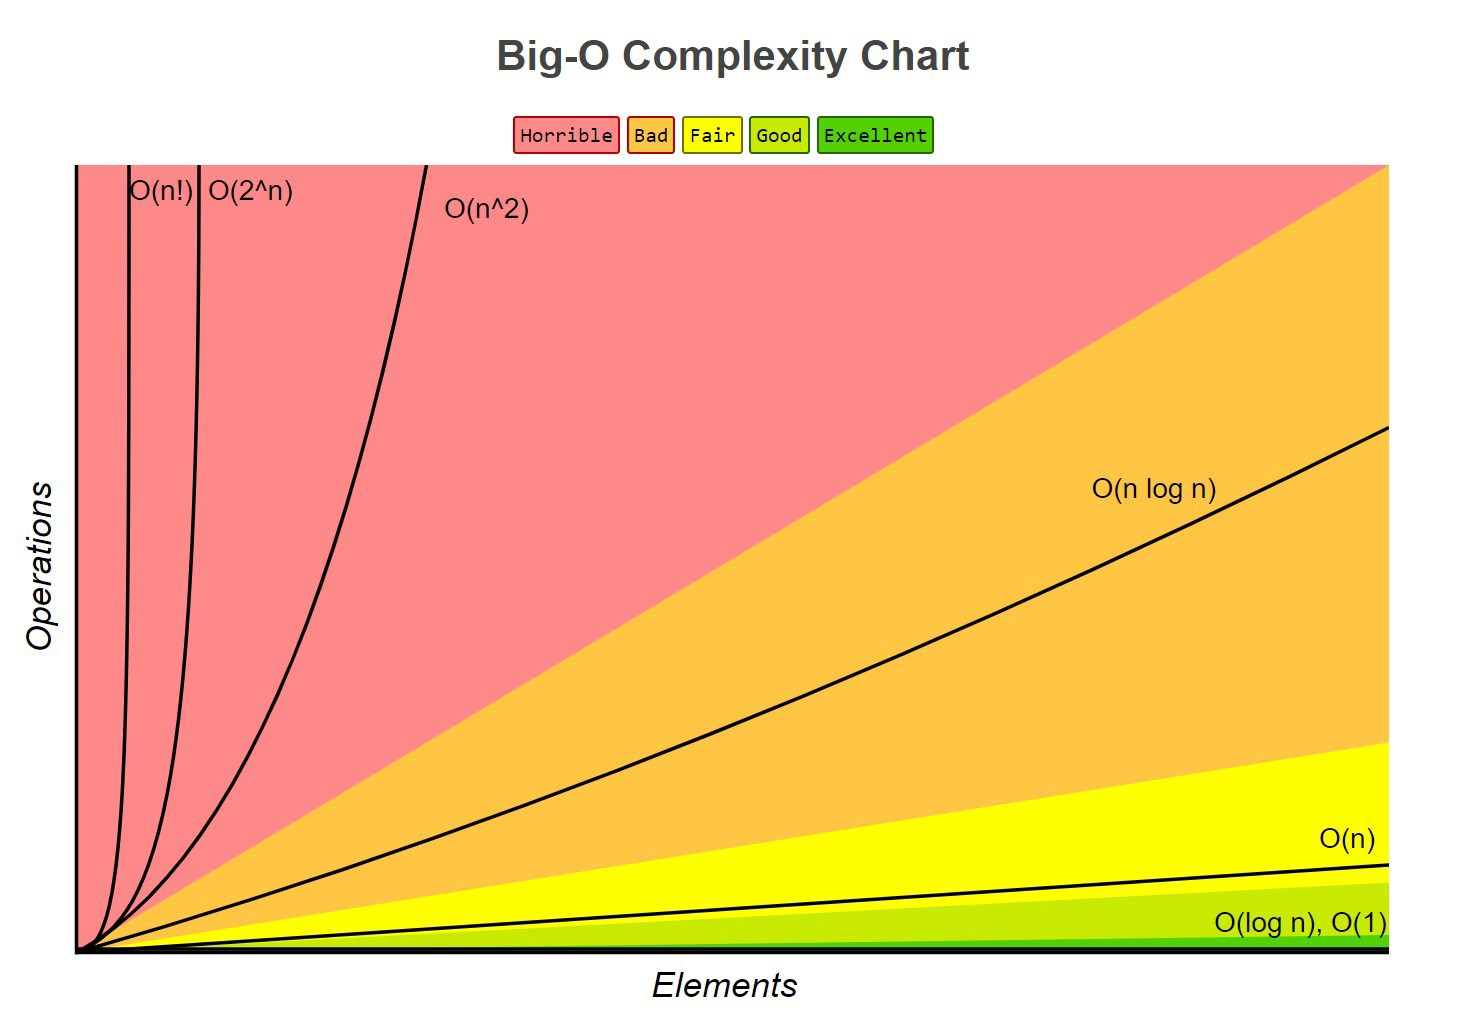

#### Table of common time complexities
These are the most common time complexities expressed using the Big-O notation:

In [ ]:
╔══════════════════╦═════════════════╗
║       Name       ║ Time Complexity ║
╠══════════════════╬═════════════════╣
║ Constant Time    ║       O(1)      ║
╠══════════════════╬═════════════════╣
║ Logarithmic Time ║     O(log n)    ║
╠══════════════════╬═════════════════╣
║ Linear Time      ║       O(n)      ║
╠══════════════════╬═════════════════╣
║ Quasilinear Time ║    O(n log n)   ║
╠══════════════════╬═════════════════╣
║ Quadratic Time   ║      O(n^2)     ║
╠══════════════════╬═════════════════╣
║ Exponential Time ║      O(2^n)     ║
╠══════════════════╬═════════════════╣
║ Factorial Time   ║       O(n!)     ║
╚══════════════════╩═════════════════╝

---

**Constant Notation: O(1)**

In [ ]:
def getFirstElement(arr):
    return arr[0]

In [ ]:
arr1 = [1, 2, 3]
print(getFirstElement(arr1))

arr2 = [i for i in range(10000000)] # generating takes some time
print(getFirstElement(arr2))        # but function getFirstElement will take constant time

- `getFirstElement` function will retrieve the first element of a given array

 - <u>always be completed in constant time regardless of size of the array</u>
<br>
<br>

- Therefore, considered to have a time computational complexity of $O(1)$
<br>

*Note:*  
-  accessing to an element in a list/array is considered as O(1)

- arrays/list are implemented as array-based sequences i.e. references to a list’s elements are stored in a <u>contiguous</u> block of memory

 - this means the $i^{th}$ element of the list can be found, not by iterating through the list one element at a time, but by validating the index and using it as an offset into the underlying array

In [ ]:
# another example of constant notation
my_list = [35, 65, 14, 43, 8, 5, 98]  # constant time
print(my_list[3])                     # constant time when accessing element in a list

if-else statements are also typically constant time. However, it is important to note that not all if-else statements are equal even though both produces the same output.

In [ ]:
# function to print the grades depending on the marks
def grade_1(marks):
    if marks >= 90:
        print('A')
    if marks >= 80 and marks < 90:
        print('B')
    if marks >= 70 and marks < 80:
        print('C')
    if marks >= 60 and marks < 70:
        print('D')
    if marks >= 50 and marks < 60:
        print('E')
    if marks < 50:
        print('F')
    return

grade_1(79)

In [ ]:
# similar function as grade_1 but note how this performs better than the previous function
def grade_2(marks):
    if marks >= 90:
        print('A')
    elif marks >= 80:
        print('B')
    elif marks >= 70:
        print('C')
    elif marks >= 60:
        print('D')
    elif marks >= 50:
        print('E')
    else:
        print('F')
    return

grade_2(79)

---

**Constant Notation: O(n)**

In [ ]:
# given that the size of array is equals to n
'''linear search returns the number of steps it takes to reach the element x'''
def linearSearch(arr, x):
    for i in range(len(arr)): 
        if arr[i] == x: 
            return i + 1  
    return -1

In [ ]:
arr = [10,20,30,40,50,60,70,80,90,100]
x = 20
print("number of steps to search for", x, ":  ", linearSearch(arr,20))

- To determine the big O notation of the linear search algorithm, consider worst-case performance
 - if the element is at the end of the list, it will take $n$ iterations
<br>  
<br>
- even if the input size is doubled to $2n$ or only a fraction of the original size e.g. $0.1n$, the big O notation is still O(n)

---

**Logarithmic Notation: O(log n)**

In [ ]:
# given that the size of array is equals to n
def binarySearch(arr, x):
    count = 0
    left = 0
    right = len(arr) - 1
    while right >= left:
        count+=1
        middle = (left + right) // 2
        if x == arr[middle]:
            return count
        if x < arr[middle]:
            right = middle - 1
        else:
            left = middle + 1
    return count

In [ ]:
'''n = 5'''
a = 1
myList1 = [47,82,71,8,1]
myList1=sorted(myList1)
print("n: ", len(myList1))
print("Number of steps required to search for", a, ": ", binarySearch(myList1, a) )

In [ ]:
'''n = 10'''
b = 1
myList2 = [46,7,89,2,59,47,82,71,8,1]
myList2=sorted(myList2)
print("n: ", len(myList2))
print("Number of steps required to search for", b, ": ", binarySearch(myList2, b) )

In [ ]:
'''n = 20'''
c = 1
myList3 = [20,50,16,80,60,43,9,46,95,35,46,7,89,2,59,47,82,71,8,1]
myList3=sorted(myList3)
print("n: ", len(myList3))
print("Number of steps required to search for", c, ": ", binarySearch(myList3, c) )

In [ ]:
'''n = 40'''
d = 1
myList4 = [12,4,58,42,73,96,70,97,86,5,23,78,64,3,25,57,62,34,78,6,20,50,16,80,60,43,9,46,95,35,46,7,89,2,59,47,82,71,8,1]
myList4=sorted(myList4)
print("n: ", len(myList4))
print("Number of steps required to search for", d, ": ", binarySearch(myList4, d) )

- <u>it only takes one additional step to find an element despite the size of the problem, $n$, doubling (or trippling, etc) </u>
 - growth rate is what is known as *logarithmic* 
<br>
<br>

To provide a clearer picture, we use the values found previously in the binary search algorithm to plot a graph of the average number of steps against the array size, $n$.

In [ ]:
import matplotlib.pyplot as plt

#n = [10000, 20000, 40000,80000,160000,320000]
n=[5,10,20,40]
#steps = [12,13,14,15,16,17]
steps=[2,3,4,5]

plt.plot(n, steps, 'b')
plt.xlabel('Array size, n')
plt.ylabel('Number of steps')
plt.title('Logarithmic Complexity')
plt.show()

- a logarithmic algorithm is one whose rate of growth decreases as the problem size increases

- also note, it's not uncommon to use $\log{n}$ to imply $\log_2{n}$ when specifying the run time of an algorithm (refer to DS-L02a for further details regarding logarithms)

---

**Polynomial Notation: *O(n&#x00B2;)*, *O(n&#x00B3;)*, etc.**

In [ ]:
def searchSquareArray(arr, x, n): # where n is the size of the square array
    for row in range(n):
        for col in range(n):
            if arr[row][col] == x: 
                return (row + 1), (col + 1)
    return -1

In [ ]:
sqrArr = [[8,4,9],[7,1,5],[3,2,6]]
n = len(sqrArr)
print("(row, col):", searchSquareArray(sqrArr,1,n))

- the function above represents a search algorithm for finding the index of an element in a square array, where $n$ is the size of the square array.

- it returns the row and column of the element in the square array.

- comprises of a nested `for` loop which iterates for $0$ to $n$ for each loop

- worst case scenario (element is at end of the square array)
 - it will take $n^2$ steps to reach the element
<br>
<br>
- above example is *quadratic*

![search_square_array](https://i.ibb.co/ctstDDv/Slide4.png)

---

### Characterizing Functions in Simplest Terms

- big O notation can be determined by simplifying terms

*Example:*
> Given that the growth rate of a particular algorithm is define as $C(n) = 50000 log (n)\ +\ 4n^2\ + 0.7n\ + 830$ where $n$ is the input size, what is the big O of the algorithm?

(double click <u><b style="color:blue;">here</b></u>)

<!-- referring to principles of big O, answer is O(n^2) -->

**Important Notes**  
It is important to note that when analyzing the time complexity of an algorithm with several operations we need to describe the algorithm based on the largest complexity among all operations.   
For example:

In [ ]:
def my_function(data):
    first_element = data[0]
    
    for value in data:
        print(value)
    
    for x in data:
        for y in data:
            print(x, y)

Even that the operations in ‘my_function’ don’t make sense we can see that it has multiple time complexities: O(1) + O(n) + O(n²). So, when increasing the size of the input data, the bottleneck of this algorithm will be the operation that takes O(n²). Based on this, we can describe the time complexity of this algorithm as O(n²).

---

**Exercise**:
> Determine the big O of the following growth rate function:  
> $C(n) = 1 + 2 + 3 + \cdots + (n-1) + n$

### Big O Notation of Common Functions

https://www.ics.uci.edu/~pattis/ICS-33/lectures/complexitypython.txt

---

### Additional Information

- there are still many other notations, such as $O(n^2)$, $O(n!)$, $O(n \log{n})$. You are encouraged to explore more about the other notations.

- note of caution:
 - big O notations notations can be somewhat misleading if the constant factors they “hide” are very large
 - e.g.  while it is true that the function $10^{100}n$ is $O(n)$, if this is the running time of an algorithm being compared to one whose running time is $10n\log n$, we should prefer the $O(n \log{n})$ time algorithm, even though the linear-time algorithm is faster
 - $10^{100}$ is the number of atoms in the observarable universe - unlikely to reach that input size in a rule world problem

*Class Discussion:*
> What constitutes a 'fast' algorithm?

(double click <u><b style="color:blue;">here</b></u>)

<!-- 

Generally speaking, any algorithm running in O(n log n) time (with a reasonable constant factor) should be considered efficient.

Even an O(n^2) time function may be fast enough in some contexts, that is, when n is small.

But an algorithm running in O(2^n) time should almost never be considered efficient.

-->

### Exercise:

**Q. Which of the following best describes the useful criterion for comparing the efficiency of algorithms?**  
A. Time  
B. Memory  
C. Both of the above  
d. None of the above  

**Q. How is time complexity measured?**    
A. By counting the number of statements in an algorithm  
B. By counting the number of primitive operations performed by the algorithm on a given input size  
C. By counting the size of data input to the algorithm  
D. None of the above

**Q. Which of the following does NOT belong to the family of notations?**  
1. Big (O)  
2. Big (Ω)  
3. Big (θ)  
4. Big (⋈)  

**Q. What will be the time complexity of following fragment of code?** 

In [ ]:
for i in range(n):  
    i*=k  

1. O(n)
2. O(k)
3. O(log k)
4. O(log n)

**Q. What is the running time complexity of the following code snippet?**  

In [ ]:
for i in range(n):
    for j in range(i):
        val += 1

A) n  
B) n(n+1)  
C) n(n-1)/2  
D) n(n+1)/n  

**Q. Algorithm A and B have a worst case running time of O(n) and O(log n), respectively. Therefore, algorithm B always run faster than algorithm A.**  
A) True  
B) False